# Web Scraping
### Definition:- Web scraping is the process of extracting and parsing data from websites in an automated fashion using a computer Program. It's a useful technique for creating datasets for research and learning

## Problem Statement:- We're going to scrap https://github.com/topics and for each topic , we'll scrap the top  repositories.

## Tools:- Python , Requests , Beautiful Soup , Pandas

#### Pick a website and describe your objective
- Browse through different sites and pick one to scrape.
- Identify the information you'd like to scrape from the site. Decide the format of the output CSV file.
- Summarize your project idea and outline your strategy in a Juptyer notebook.

- We're going to scrape https://github.com/topics
- We'll get a list of topics . For each topic , we'll get topic title , page URL and topic description.
- For each topic , we'll get top 50 repositories in the topic from the topic page
- now for each repository , we'll create a CSV file in the following format:-
```
Repo Name,Username,Stars,Repo URL
three.js,mrdoob,69700,https://github.com/mrdoob/three.js
libgdx,libgdx,19600,https://github.com/libgdx/libgdx
```

Step1> Use the request library to download the web pages.
What is request Module?

The requests module allows you to send HTTP requests using Python.The HTTP request returns a Response Object with all the response data (content, encoding, status, etc).

Install the request library(pip install requests)
import it into your jupyter notebook (import requests)
firstly get the web page
then parse/download the web page
to get more info about the requests module check this link (https://www.w3schools.com/python/module_requests.asp)
now after downloading if we want to check that whether the response is succesful or not then check the status code of the response. To get more info about the response then check this link (https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)

In [63]:
!pip install requests --upgrade --quiet

In [2]:
import requests


In [3]:
topics_url = 'https://github.com/topics'

In [4]:
response = requests.get(topics_url)

In [65]:
response.status_code

200

In [6]:
len(response.text)

174327

In [7]:
page_contents = response.text

#### Step 2- Use Beautiful Soup to parse and extract information¶

- Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree.
- For more info about Beautiful Soup go through this link -(https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [8]:
!pip install beautifulsoup4 --upgrade --quiet


In [9]:
from bs4 import BeautifulSoup


In [10]:
doc = BeautifulSoup(page_contents, 'html.parser')

We're trying to find out all the topic names on github.com/topics website and we did it with the help of class 

In [12]:
selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
topic_title_tags = doc.find_all('p' , {'class':selection_class})

In [13]:
len(topic_title_tags)

30

In [14]:
topic_title_tags

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Angular</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ansible</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">API</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Arduino</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">ASP.NET</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Atom</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Awesome Lists</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amazon Web Services</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Azure</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Babel</p>,
 <p class="f3 lh-condensed m

Here we're trying to find out the description of each topic.

In [15]:
desc_selector = 'f5 color-fg-muted mb-0 mt-1'
topic_desc_tags = doc.find_all('p' , {'class': desc_selector})

In [16]:
len(topic_desc_tags)

30

In [69]:
topic_desc_tags[0]


<p class="f5 color-fg-muted mb-0 mt-1">
          3D modeling is the process of virtually developing the surface and structure of a 3D object.
        </p>

Here we're trying to find out the link of each topic 

In [18]:
topic_link_tags = doc.find_all('a', {'class':'no-underline flex-grow-0'})

In [19]:
len(topic_link_tags)

30

In [70]:
topic_link_tags[0]

<a class="no-underline flex-grow-0" href="/topics/3d">
<div class="color-bg-accent f4 color-fg-muted text-bold rounded mr-3 flex-shrink-0 text-center" style="width:64px; height:64px; line-height:64px;">
            #
          </div>
</a>

In [21]:
topic0_url ="https://github.com" + topic_link_tags[0]['href']
print(topic0_url)

https://github.com/topics/3d


In [22]:
topic_titles = []

for tag in topic_title_tags:
    topic_titles.append(tag.text)
    
    
print(topic_titles)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Atom', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'COVID-19', 'C++']


In [23]:
topic_desc=[]
for tag in topic_desc_tags:
    topic_desc.append(tag.text.strip())
    
topic_desc

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.',
 'Angular is an open source web application platform.',
 'Ansible is a simple and powerful automation engine.',
 'An API (Application Programming Interface) is a collection of protocols and subroutines for building software.',
 'Arduino is an open source hardware and software company and maker community.',
 'ASP.NET is a web framework for building modern web apps and services.',
 'Atom is a open source text editor built with web technologies.',
 'An awesome list is a list of awesome things curated by the community.',
 'Amazon Web Services provides on-demand cloud computing platforms on a subscription basis.',
 'Azu

In [24]:
topic_urls = []
base_url = 'https://github.com'

for tag in topic_link_tags:
    topic_urls.append(base_url + tag['href'])
    
topic_urls

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/atom',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compil

We've used Pandas as well 
- Pandas is a Python library.
- Pandas is used to analyze data.
- To know more about Pandas , go through this link :(https://www.w3schools.com/python/pandas/default.asp) 

In [25]:
!pip install pandas --quiet


In [26]:
import pandas as pd

In [27]:
topics_dict = {
    'title' : topic_titles,
    'description':topic_desc,
    'url':topic_urls
    
}

To convert  dataframe into csv format.

In [28]:
topics_df = pd.DataFrame(topics_dict)

In [29]:
topics_df

,title,description,url
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


In [30]:
topics_df.to_csv('topics.csv' , index=None)

In [31]:
topic_page_url = topic_urls[0]

In [32]:
topic_page_url

'https://github.com/topics/3d'

In [33]:
response = requests.get(topic_page_url)

In [34]:
response.status_code

200

In [35]:
len(response.text)

664365

In [36]:
topic_doc = BeautifulSoup(response.text , 'html.parser')

In [38]:
h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
repo_tags = topic_doc.find_all('h3',{'class': h3_selection_class})

In [39]:
repo_tags[0]

<h3 class="f3 color-fg-muted text-normal lh-condensed">
<a data-ga-click="Explore, go to repository owner, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4bdbc49d3c05ae7f70b531fbce709a384200b0768554e0172950286a8db30940" data-view-component="true" href="/mrdoob">
            mrdoob
</a>          /
          <a class="text-bold wb-break-word" data-ga-click="Explore, go to repository, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="517d3d5cb9d897521

In [40]:
len(repo_tags)

30

In [41]:
a_tags = repo_tags[0].find_all('a')

In [42]:
a_tags

[<a data-ga-click="Explore, go to repository owner, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4bdbc49d3c05ae7f70b531fbce709a384200b0768554e0172950286a8db30940" data-view-component="true" href="/mrdoob">
             mrdoob
 </a>,
 <a class="text-bold wb-break-word" data-ga-click="Explore, go to repository, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="517d3d5cb9d89752156923904a4238816bc9b51ab7772f3e3644ce897d8dd4e5" data-view-component="tr

In [43]:
a_tags[0].text.strip()

'mrdoob'

In [44]:
a_tags[1].text.strip()

'three.js'

In [45]:
base_url = 'https://github.com'
repo_url = base_url + a_tags[1]['href']
print(repo_url)

https://github.com/mrdoob/three.js


In [46]:
star_tags = topic_doc.find_all('span' , {'class':'Counter js-social-count'})


In [47]:
len(star_tags)

30

In [48]:
star_tags[0].text.strip()

'78.1k'

In [49]:
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1] == 'k':
        return int(float(stars_str[:-1]) * 1000)
    return int(stars_str)

In [50]:
parse_star_count(star_tags[0].text.strip())

78100

In [51]:
def get_repo_info(h3_tag , star_tag):
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username , repo_name , stars , repo_url

In [52]:
get_repo_info(repo_tags[0], star_tags[0])

('mrdoob', 'three.js', 78100, 'https://github.com/mrdoob/three.js')

In [53]:
topic_repos_dict = {
    'username' :[],
    'repo_name' :[],
    'stars' :[],
    'repo_url':[]
}


for i in range(len(repo_tags)):
    repo_info = get_repo_info(repo_tags[i] , star_tags[i])
    topic_repos_dict['username'].append(repo_info[0])
    topic_repos_dict['repo_name'].append(repo_info[1])
    topic_repos_dict['stars'].append(repo_info[2])
    topic_repos_dict['repo_url'].append(repo_info[3])

In [55]:
topic_repos_df = pd.DataFrame(topic_repos_dict)

In [56]:
topic_repos_df

,username,repo_name,stars,repo_url
0,mrdoob,three.js,78100,https://github.com/mrdoob/three.js
1,libgdx,libgdx,19600,https://github.com/libgdx/libgdx
2,pmndrs,react-three-fiber,16500,https://github.com/pmndrs/react-three-fiber
3,BabylonJS,Babylon.js,15800,https://github.com/BabylonJS/Babylon.js
4,aframevr,aframe,13700,https://github.com/aframevr/aframe
5,ssloy,tinyrenderer,12000,https://github.com/ssloy/tinyrenderer
6,lettier,3d-game-shaders-for-beginners,11900,https://github.com/lettier/3d-game-shaders-for...
7,FreeCAD,FreeCAD,10600,https://github.com/FreeCAD/FreeCAD
8,metafizzy,zdog,9000,https://github.com/metafizzy/zdog
9,CesiumGS,cesium,8200,https://github.com/CesiumGS/cesium


## Final Code Starts...

In [57]:
import os
def get_topic_page(topic_url):
    #download the main page
    response = requests.get(topic_url)
    #check successful response
    if response.status_code !=200:
        raise Exception('failed to load page {}'.format(topic_url))
    #parse using beautiful soup
    topic_doc = BeautifulSoup(response.text , 'html.parser')
    return topic_doc


def get_repo_info(h3_tag , star_tag):
    #returns all the required info about a repo.
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username , repo_name , stars , repo_url

def get_topic_repos(topic_doc):
    #get the h3 tag containing repo title , repo url and username
    h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
    repo_tags = topic_doc.find_all('h3',{'class': h3_selection_class})
    
    #get the star tags
    star_tags = topic_doc.find_all('span' , {'class':'Counter js-social-count'})
    topic_repos_dict = {
    'username' :[],
    'repo_name' :[],
    'stars' :[],
    'repo_url':[]
    }


    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i] , star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])
        
    return pd.DataFrame(topic_repos_dict)






    



To get topic titles, we can pick p tags with the class "f3 lh-condensed mb-0 mt-1 Link--primary"

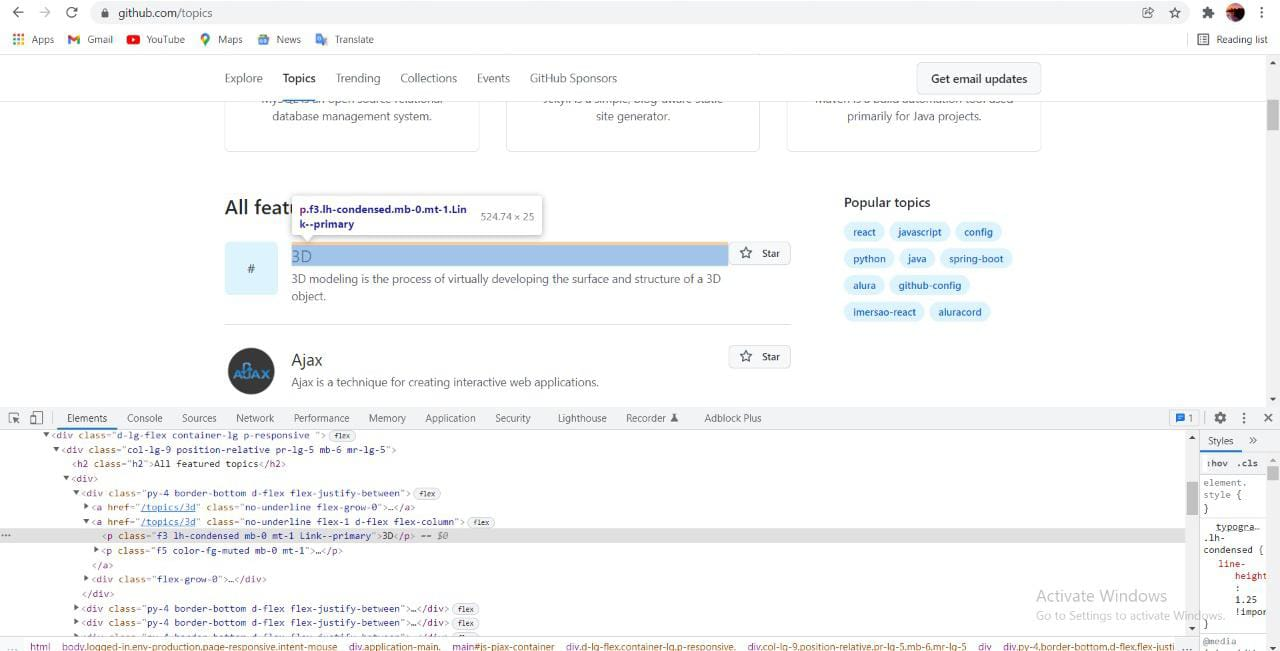

--------------------------------------------------------------------------------

Similiarly , i did for descriptions as well, to get description of each topic we can pick 'p' tags with the class "f5 color-fg-muted mb-0 mt-1"


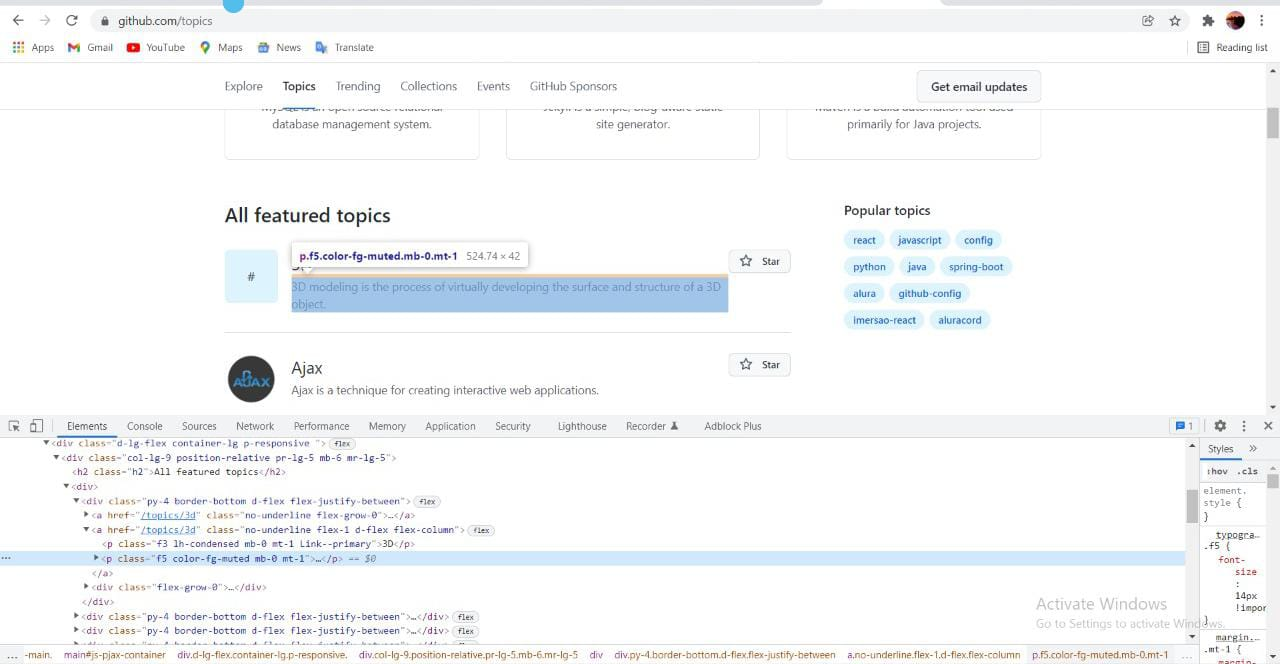

Similiarly , I did for topic URL's

In [58]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p' , {'class':selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles
    
def get_topic_descs(doc):
    desc_selector = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p' , {'class': desc_selector})
    topic_desc = []
    for tag in topic_desc_tags:
        topic_desc.append(tag.text.strip())

    return topic_desc

def get_topic_urls(doc):
    topic_link_tags = doc.find_all('a', {'class':'no-underline flex-grow-0'})
    topic_urls = []
    base_url = 'https://github.com'
    for tag in topic_link_tags:
        topic_urls.append(base_url + tag['href'])
    return topic_urls

def scrape_topics():
    topics_url = 'https://github.com/topics'
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    
    topics_dict = {
        'title': get_topic_titles(doc),
        'description': get_topic_descs(doc),
        'url': get_topic_urls(doc)
    }
    
    return pd.DataFrame(topics_dict)


In [59]:
scrape_topics()

,title,description,url
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


In [60]:
def scrape_topic(topic_url, path):
    if os.path.exists(path):
        print("The file {} already exists. Skipping...".format(path))
        return
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path, index=None)



#### Putting it all together
- We have a funciton to get the list of topics
- We have a function to create a CSV file for scraped repos from a topics page
- Let's create a function to put them together

In [61]:
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()
    
    os.makedirs('data', exist_ok=True)
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for "{}"'.format(row['title']))
        scrape_topic(row['url'], 'data/{}.csv'.format(row['title']))

In [62]:
scrape_topics_repos()

Scraping list of topics
Scraping top repositories for "3D"
Scraping top repositories for "Ajax"
Scraping top repositories for "Algorithm"
Scraping top repositories for "Amp"
Scraping top repositories for "Android"
Scraping top repositories for "Angular"
Scraping top repositories for "Ansible"
Scraping top repositories for "API"
Scraping top repositories for "Arduino"
Scraping top repositories for "ASP.NET"
Scraping top repositories for "Atom"
Scraping top repositories for "Awesome Lists"
Scraping top repositories for "Amazon Web Services"
Scraping top repositories for "Azure"
Scraping top repositories for "Babel"
Scraping top repositories for "Bash"
Scraping top repositories for "Bitcoin"
Scraping top repositories for "Bootstrap"
Scraping top repositories for "Bot"
Scraping top repositories for "C"
Scraping top repositories for "Chrome"
Scraping top repositories for "Chrome extension"
Scraping top repositories for "Command line interface"
Scraping top repositories for "Clojure"
Scrapin